<div style="text-align: center;">
    <b><span style="font-size: 27px;">API Data Analysis for Cryptocurrency Assets📈</span></b>
</div>


**Introduction:** This task involves analyzing cryptocurrency data obtained from the CoinCap API using Python libraries such as requests, pandas, and matplotlib. The data will be processed, normalized, and visualized to gain insights into cryptocurrency trends.

### **Importing Libraries:**
   - `requests`: For making API requests.
   - `pandas`: For processing and analyzing the data.
   - `matplotlib` : For making Visualization

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### API Request (CoinCap's API)
   - URL: `http://api.coincap.io/v2/assets`.
   - Headers: 
     - `Content-Type`: Specifies the content type (JSON).
     - `Accept-Encoding`: Specifies the encoding format.
   - The GET request fetches the data from the API.

In [59]:
url = 'http://api.coincap.io/v2/assets'
header = {"Content-Type":"application/json",
         "Accept-Encoding":"deflate"}


response = requests.get(url,headers= header)
if response.status_code == 200:
    print('API request successful!')
    responseData = response.json()
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

API request successful!


### **Processing the Response:**

In [60]:
print(responseData)

{'data': [{'id': 'bitcoin', 'rank': '1', 'symbol': 'BTC', 'name': 'Bitcoin', 'supply': '19783031.0000000000000000', 'maxSupply': '21000000.0000000000000000', 'marketCapUsd': '1796813154765.0313046822245845', 'volumeUsd24Hr': '15793259991.5856717920312048', 'priceUsd': '90825.9788282711230995', 'changePercent24Hr': '1.2056588503505350', 'vwap24Hr': '90862.6697376544086360', 'explorer': 'https://blockchain.info/'}, {'id': 'ethereum', 'rank': '2', 'symbol': 'ETH', 'name': 'Ethereum', 'supply': '120421301.4575529800000000', 'maxSupply': None, 'marketCapUsd': '379416214287.5987932959394604', 'volumeUsd24Hr': '10098893781.1203546044890546', 'priceUsd': '3150.7400243580519525', 'changePercent24Hr': '3.2083213813390904', 'vwap24Hr': '3113.1279817030193778', 'explorer': 'https://etherscan.io/'}, {'id': 'tether', 'rank': '3', 'symbol': 'USDT', 'name': 'Tether', 'supply': '127364484596.2452400000000000', 'maxSupply': None, 'marketCapUsd': '127395792390.6313077780840957', 'volumeUsd24Hr': '3950703

### **Normalizing the JSON Data Then Displaying it:**

In [40]:
df = pd.json_normalize(responseData,'data')
df.head()    

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19783031.0000000000000000,21000000.0000000000000000,1793688318125.6047049149451266,15877601970.4433568557309265,90668.0234250052332686,1.1531503999854112,90862.6697376544086360,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120421301.4575529800000000,None,379023500145.4633972388935087,10115529596.8050016691784308,3147.4788559652338186,3.2961045621866175,3113.1279817030193778,https://etherscan.io/
2,tether,3,USDT,Tether,127364484596.2452400000000000,None,127362362020.8951257092916780,39518291358.6233049433245553,0.9999833346371491,-0.0210423923683737,1.0001184437557326,https://www.omniexplorer.info/asset/31
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,104410793350.3378357174990764,454962232.4420920932425307,625.9596807471483093,2.1262832578889205,621.2576936072074763,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,solana,5,SOL,Solana,471989111.5537939700000000,None,101099772807.0182877917110374,1629088765.4509195928887242,214.1993752232897708,1.5559742081411794,217.3368273057370131,https://explorer.solana.com/


## EDA

In [41]:
# Inspect the DataFrame's structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 100 non-null    object
 1   rank               100 non-null    object
 2   symbol             100 non-null    object
 3   name               100 non-null    object
 4   supply             100 non-null    object
 5   maxSupply          37 non-null     object
 6   marketCapUsd       100 non-null    object
 7   volumeUsd24Hr      100 non-null    object
 8   priceUsd           100 non-null    object
 9   changePercent24Hr  100 non-null    object
 10  vwap24Hr           100 non-null    object
 11  explorer           98 non-null     object
dtypes: object(12)
memory usage: 9.5+ KB
None


In [42]:
# Basic statistical summary
df.describe()

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
count,100,100,100,100,100,37,100,100,100,100,100,98
unique,100,100,100,100,99,29,100,100,100,100,100,97
top,bitcoin,1,BTC,Bitcoin,1000000000.0000000000000000,1000000000.0000000000000000,1793688318125.6047049149451266,15877601970.4433568557309265,90668.0234250052332686,1.1531503999854112,90862.6697376544086360,https://explorer.thetatoken.org/
freq,1,1,1,1,2,4,1,1,1,1,1,2


### Convert relevant columns to numeric values 

In [56]:
df['marketCapUsd'] = pd.to_numeric(df['marketCapUsd'], errors='coerce')
df['priceUsd'] = pd.to_numeric(df['priceUsd'], errors='coerce')
df['volumeUsd24Hr'] = pd.to_numeric(df['volumeUsd24Hr'], errors='coerce')
df['changePercent24Hr'] = pd.to_numeric(df['changePercent24Hr'], errors='coerce')

# Drop rows with NaN values in critical columns (marketCapUsd, priceUsd, changePercent24Hr)
df = df.dropna(subset=['marketCapUsd', 'priceUsd', 'changePercent24Hr'])

### Plot Price Trends

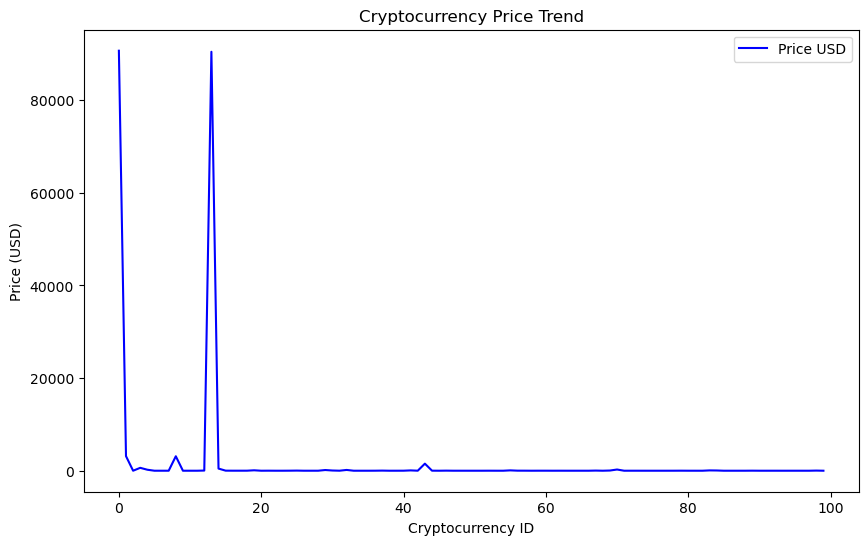

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(df['priceUsd'], label='Price USD', color='blue')
plt.title('Cryptocurrency Price Trend')
plt.xlabel('Cryptocurrency ID')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Plot 24-Hour Change Percentage Trend

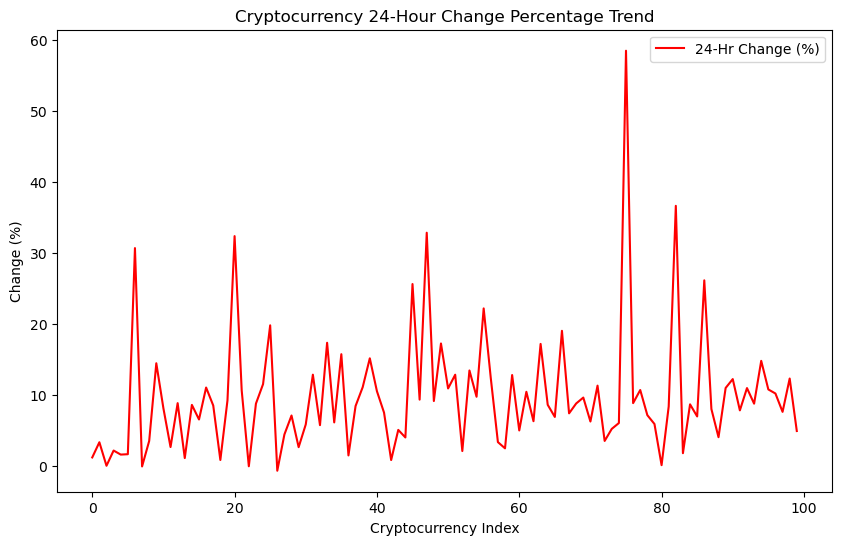

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df['changePercent24Hr'], label='24-Hr Change (%)', color='red')
plt.title('Cryptocurrency 24-Hour Change Percentage Trend')
plt.xlabel('Cryptocurrency ID')
plt.ylabel('Change (%)')
plt.legend()
plt.show()

### Analyze Correlations between Price and Market Cap


In [49]:
correlation = df[['priceUsd', 'marketCapUsd']].corr()
print('Correlation between Price and Market Cap:\n', correlation)

Correlation between Price and Market Cap:
               priceUsd  marketCapUsd
priceUsd       1.00000       0.69103
marketCapUsd   0.69103       1.00000


### Identify the top 5 cryptocurrencies by market cap

In [48]:
top_5_market_cap = df.nlargest(5, 'marketCapUsd')
print("Top 5 Cryptocurrencies by Market Cap:")
print(top_5_market_cap[['name', 'marketCapUsd']])

Top 5 Cryptocurrencies by Market Cap:
       name  marketCapUsd
0   Bitcoin  1.793688e+12
1  Ethereum  3.790235e+11
2    Tether  1.273624e+11
3       BNB  1.044108e+11
4    Solana  1.010998e+11
